# Deep Learning: Quick Object Detection with Live Cam

This python notebook deploys 'yolo' algorithm using pretrained parameters from *cvlib* and laptop/mobile camera as source to input data to ipynb.

- **Environment Initiation**

- **Uploading Image**

- **Final Computer Vision**

## Environment Iniation

Let us code a function called *take_photo* to allow us to access personal device camera. 

In [2]:
from IPython.display import HTML, Audio
#from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=1, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return len(binary)

In [3]:
!pip install cvlib

In [4]:
import cvlib as cv

C:\Users\eagle\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow

## Uploading Data

Now the function is written and we can upload data through laptop or mobile device camera live.

In [7]:
image = take_photo() # click

NameError: name 'eval_js' is not defined

## Visualization

Let us check out the performance.

[[80, 26, 760, 586]]
['person']
[0.9998898506164551]


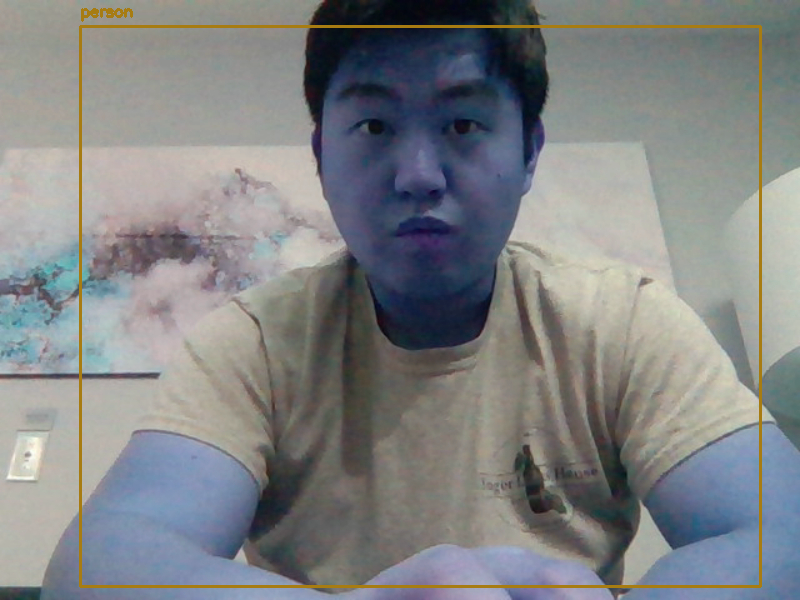

In [6]:
bbox, label, conf = cv.detect_common_objects(image, confidence=0.2, nms_thresh=0.2, model='yolov3')
print(bbox)
print(label)
print(conf)
out = cv.object_detection.draw_bbox(image, bbox, label, conf)
cv2_imshow(out)

This wraps up the project.